<a href="https://colab.research.google.com/github/Maryannaneto/churn-recommendation-system/blob/main/Copy_of_Student_dropout_prediction_model_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
#importing the libarries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Loading and examining the dataset

In [ ]:
#load dataset in csv to pandas dataframe
df =pd.read_csv('/content/dataset.csv', delimiter=";")

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
#Univariate Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

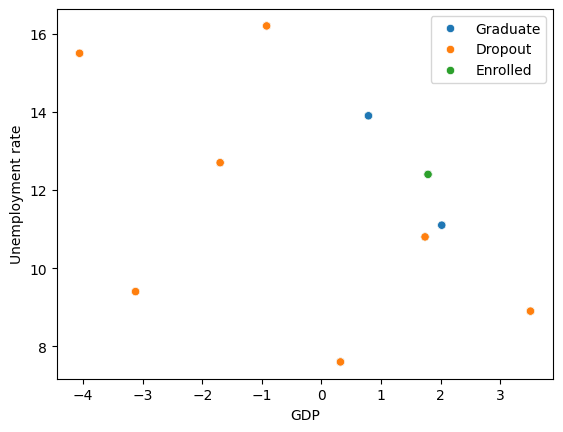

In [ ]:
ax=sns.scatterplot(x='GDP', y='Unemployment rate',hue='Target',data=df)

handles, labels  =  ax.get_legend_handles_labels()

ax.legend(handles, ['Graduate', 'Dropout', 'Enrolled'], loc='upper right')

<ipython-input-6-5cc5536bf24c>:19: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


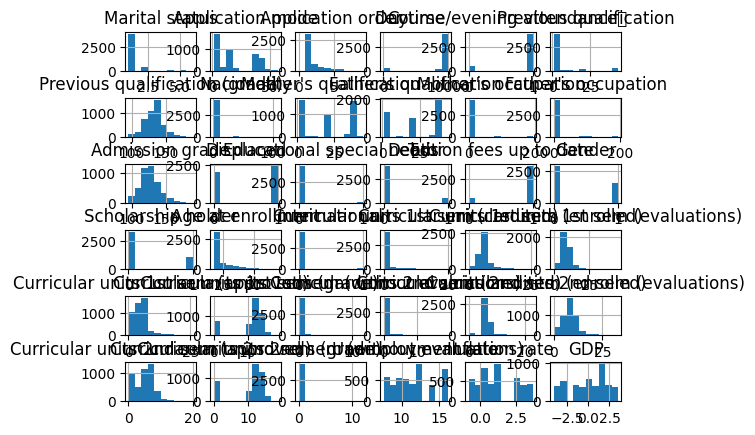

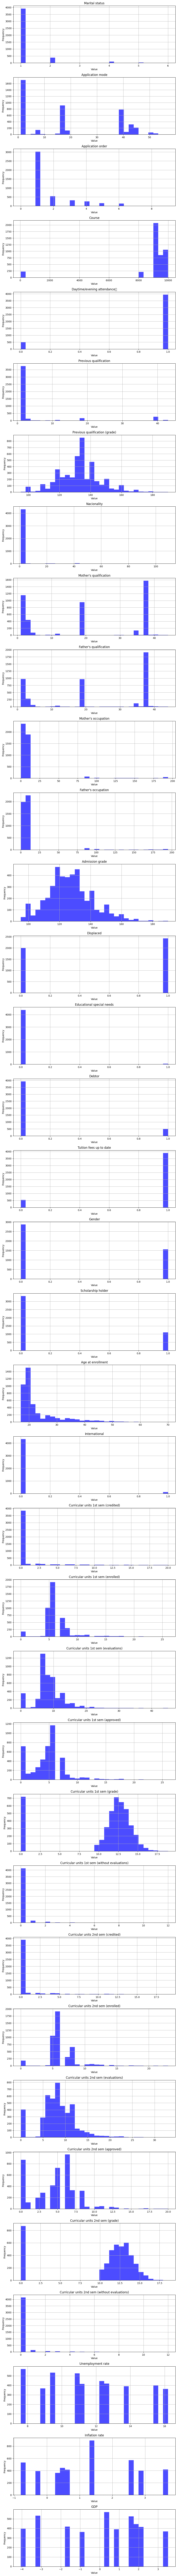

In [ ]:
#selecting my data numerical data
df.select_dtypes(exclude=['object']).columns
df[df.select_dtypes(exclude=['object']).columns].hist() # Use square brackets to select columns
plt.subplots_adjust(hspace=0.7, wspace=0.2)
columns = df.select_dtypes(exclude=['object']).columns # Replace with your column names

# Assuming you are using plt.subplots to create axes
# You need to get the axes from the subplots function
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 4*len(columns))) # Create subplots with appropriate figsize

# Then you can iterate through them
for i, ax in enumerate(axes.flat):
    df[columns[i]].hist(ax=ax, bins=30, color='blue', alpha=0.7)
    ax.set_title(columns[i])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()

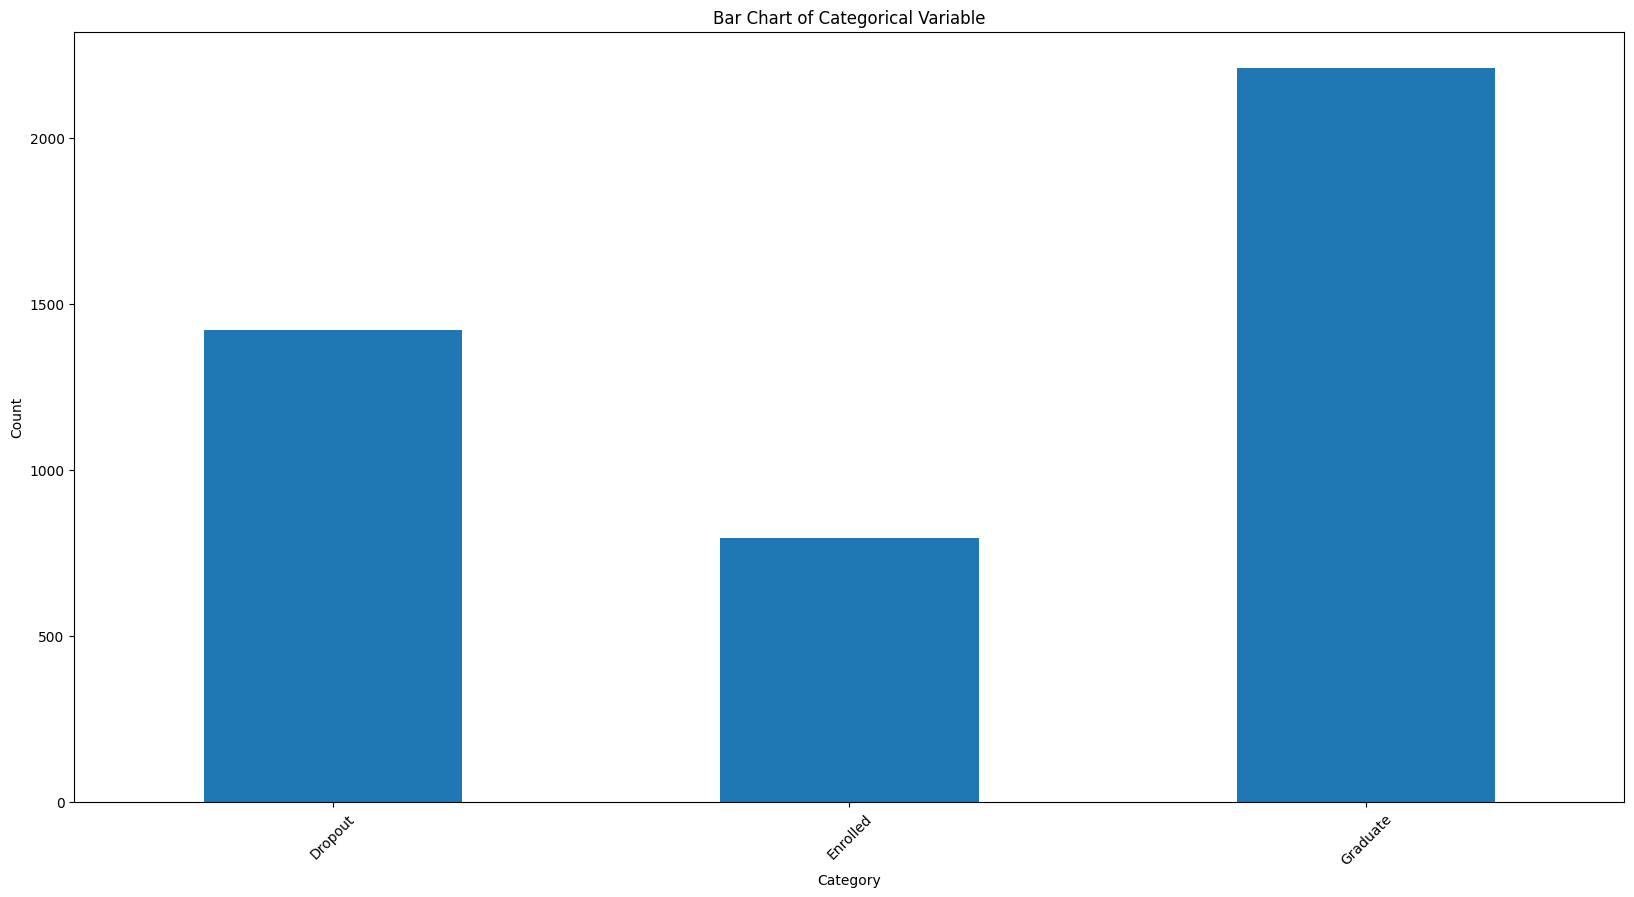

In [ ]:
#creating a  barchart for the categorical variable

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the categorical column is 'column_name'
# Replace 'column_name' with the actual name of your column

# Group the DataFrame by the categorical column and count occurrences
grouped_data = df['Target'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(20, 10))
grouped_data.plot(kind='bar', rot=45)  # Rotate x-axis labels for better readability
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart of Categorical Variable')
plt.show()

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


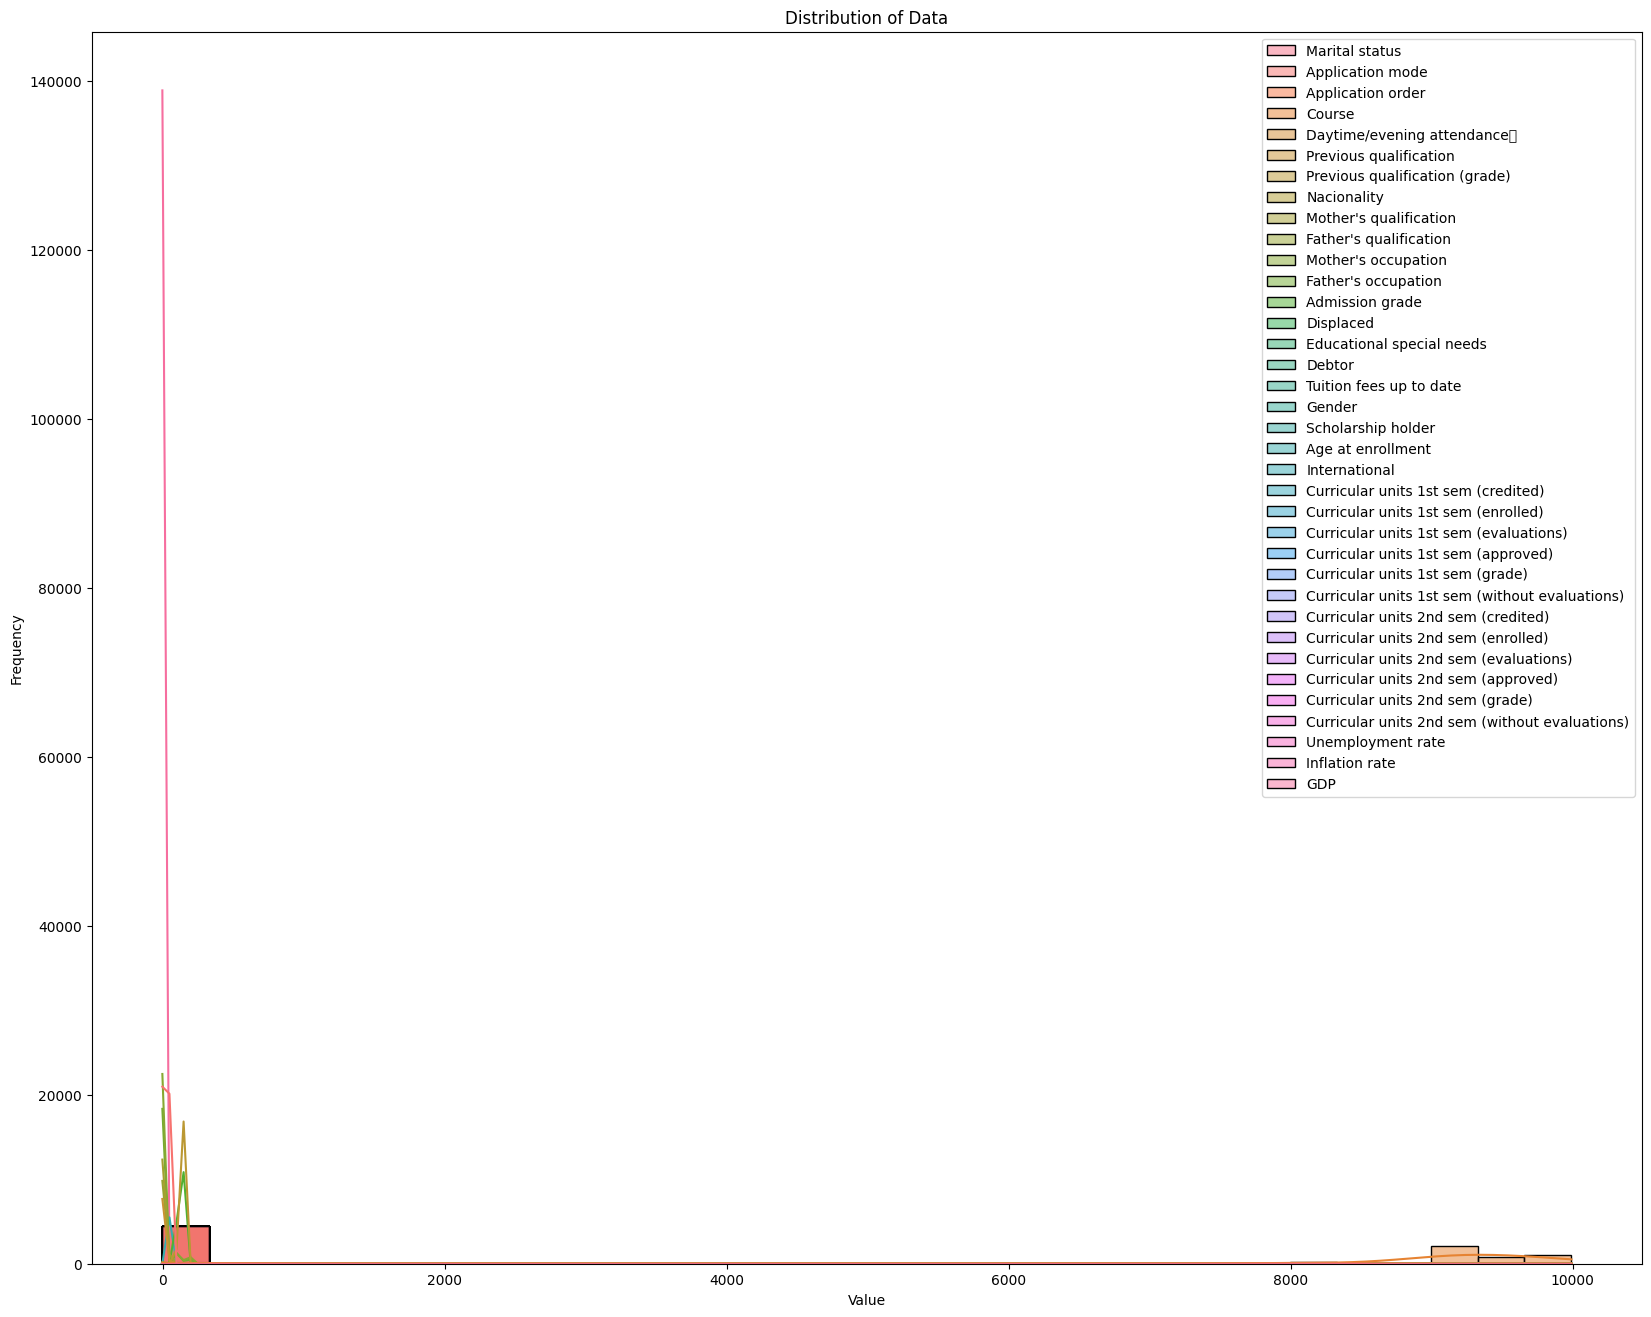

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


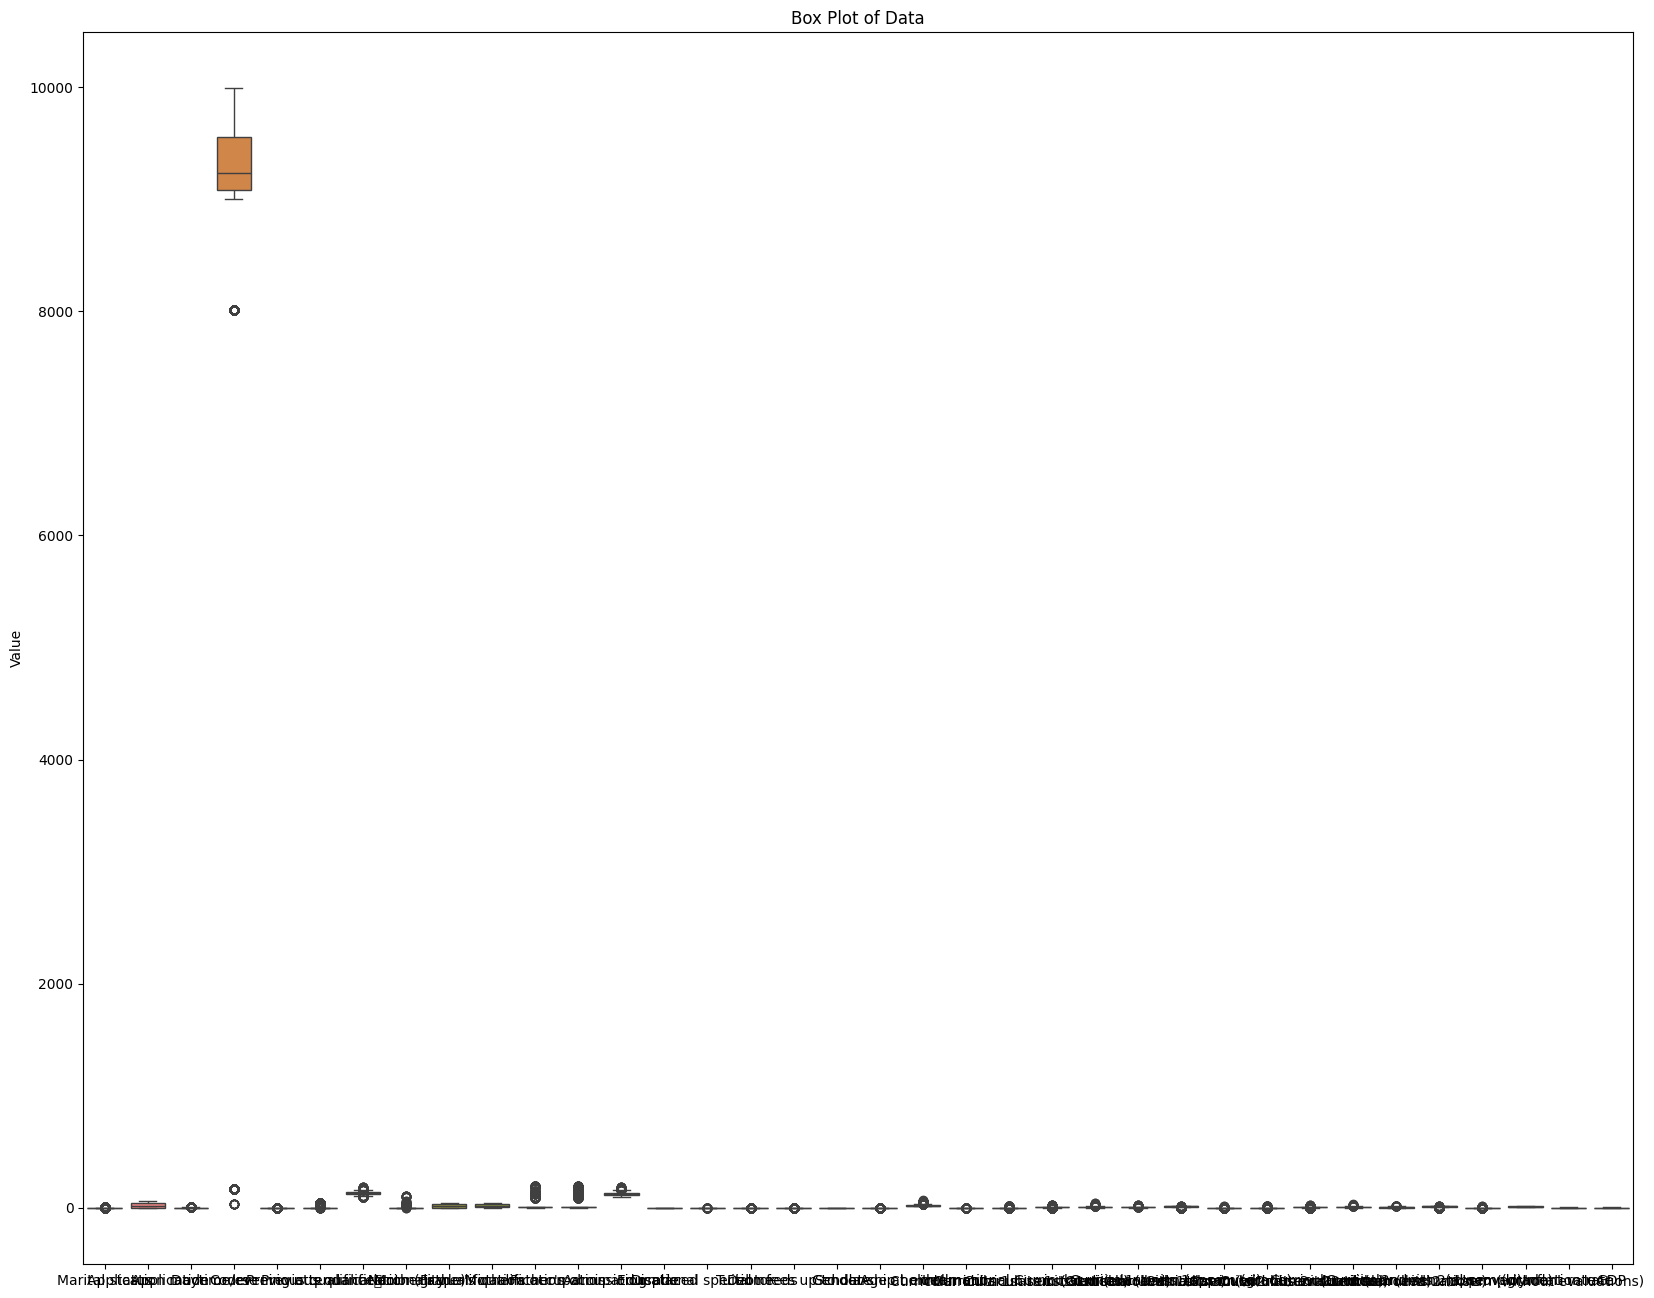

In [ ]:
#compute and visualize descriptive statistics

# Compute descriptive statistics for numerical columns only
descriptive_stats = df.describe(include=[np.number]) # Include only numerical columns

# Print the descriptive statistics
print(descriptive_stats)

# Visualize the data distribution (histogram)
plt.figure(figsize=(20, 16))
sns.histplot(df.select_dtypes(include=[np.number]), bins=30, kde=True)  # Select numerical columns
plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Visualize the data distribution (box plot)
plt.figure(figsize=(20, 16))
sns.boxplot(data=df.select_dtypes(include=[np.number])) # Select numerical columns
plt.title('Box Plot of Data')
plt.ylabel('Value')
plt.show()

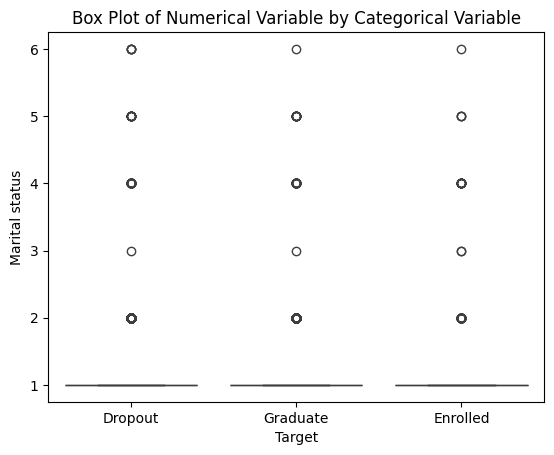

In [ ]:
numerical_variable = df[[col for col in df.columns if df[col].dtype != 'object']].columns # Replace 'Attrition_rate' with an actual numerical column from your DataFrame
categorical_variable = 'Target' # Replace with an actual categorical column from your DataFrame

# Create a box plot
sns.boxplot(x=categorical_variable, y=numerical_variable[0], data=df) # Select the first numerical variable from the array
plt.title('Box Plot of Numerical Variable by Categorical Variable')
plt.xlabel(categorical_variable)
plt.ylabel(numerical_variable[0]) # Select the first numerical variable from the array
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


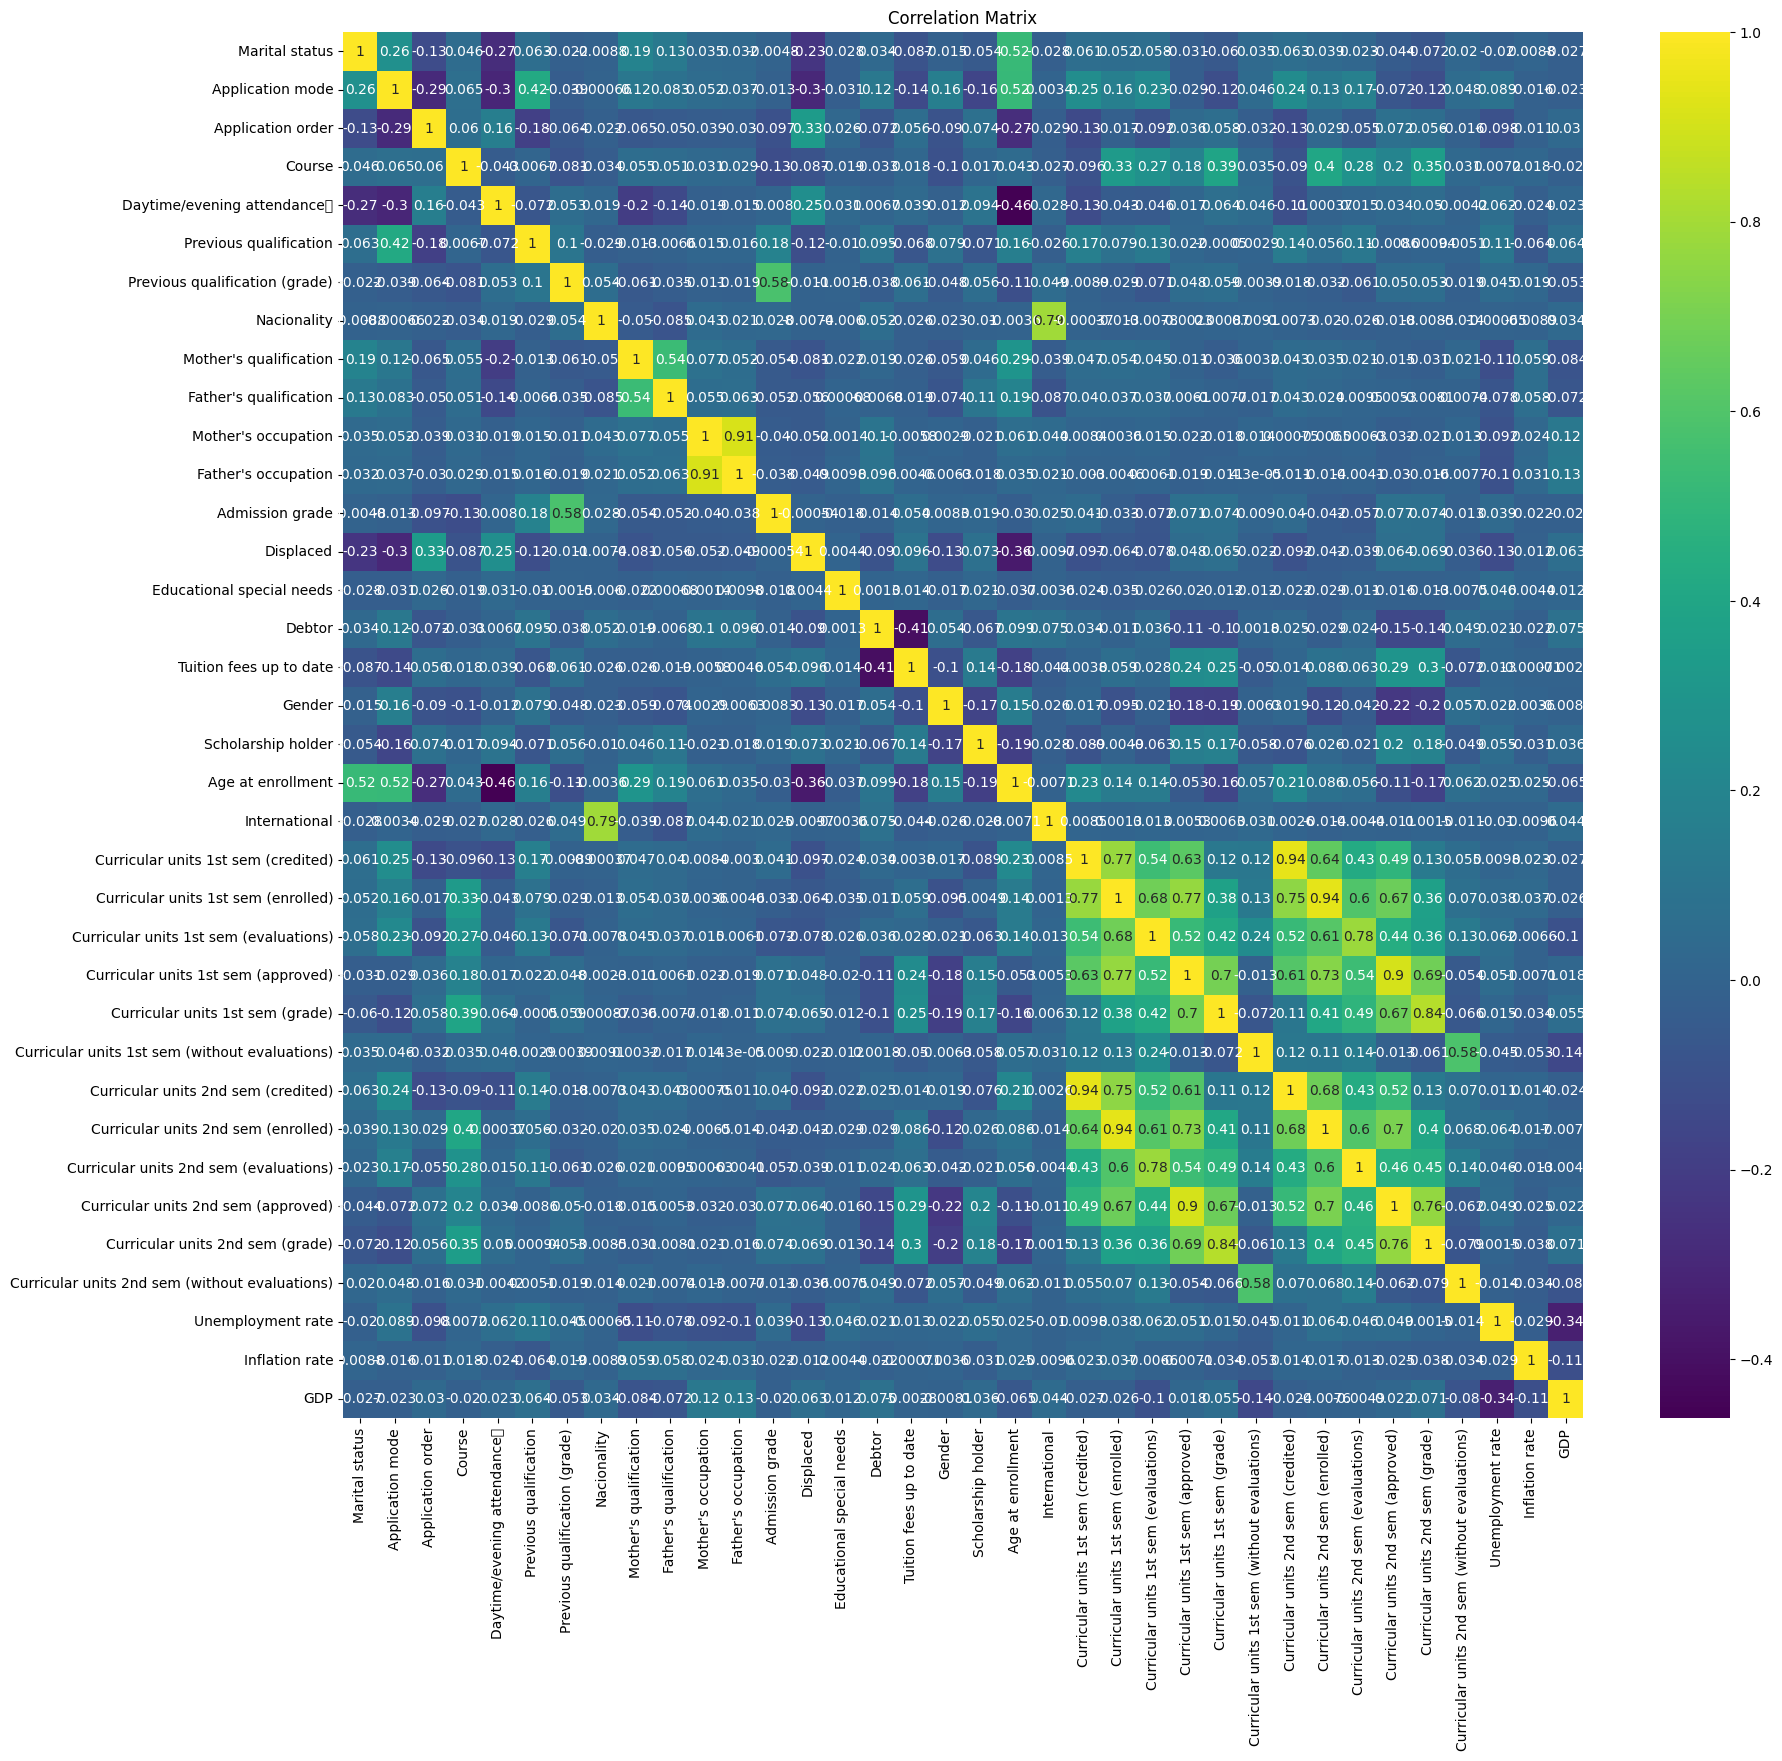

In [ ]:
#correlation analysis
correlation_matrix = df.select_dtypes(include=[np.number]).corr() # Select numerical columns
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True,  cmap='viridis')
plt.title('Correlation Matrix')
plt.show()
# Visualize the correlation matrix (heatmap) for numerical columns

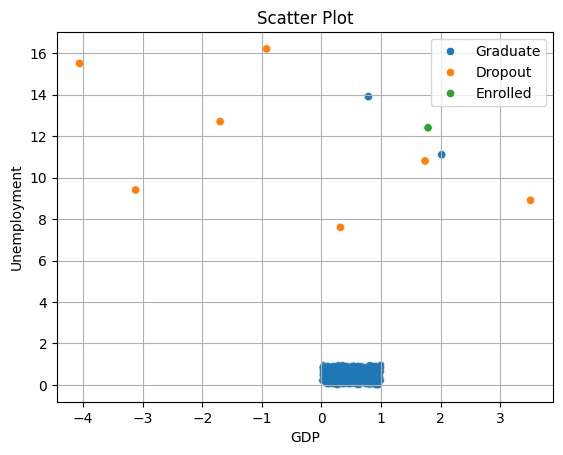

In [ ]:
# 2. BIVARATE ANALYSIS
# Creating a scatter plots of numerical variable

# Display the plot
import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = np.random.rand(500)
y = np.random.rand(500)

# Create the scatter plot
plt.scatter(x, y, s=10, alpha=0.7)

# Customize the plot
plt.xlabel("GDP")
plt.ylabel("Unemployment")
plt.title("Scatter Plot")
plt.grid(True)
ax=sns.scatterplot(x='GDP', y='Unemployment rate',hue='Target',data=df)

handles, labels  =  ax.get_legend_handles_labels()

ax.legend(handles, ['Graduate', 'Dropout', 'Enrolled'], loc='upper right')
# Display the plot
plt.show()

In [ ]:
df.Target.value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [ ]:
!pip install matplotlib-venn

In [ ]:
#ch-square tests for categorical variable

#ch-square tests for categorical variable
from scipy.stats import chi2_contingency # Correct the function name to chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['Target'], [df['Marital status'],df['Application mode'],df['Course']]) # Pass a list of columns

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1595.7604521027179
p-value: 1.5365065740898234e-81
Degrees of freedom: 648
Expected frequencies: [[4.43259494e+01 4.81803797e+00 1.92721519e+00 3.11566456e+01
  3.82231013e+01 1.02784810e+01 1.54177215e+01 4.78591772e+01
  5.36408228e+01 3.24414557e+01 1.31050633e+02 4.17563291e+00
  3.50110759e+01 6.10284810e+01 2.28053797e+01 2.89082278e+00
  3.21202532e-01 3.21202532e-01 3.21202532e-01 6.42405063e-01
  9.63607595e-01 3.21202532e-01 3.21202532e-01 3.21202532e-01
  3.21202532e-01 3.21202532e-01 3.21202532e-01 1.28481013e+00
  3.21202532e-01 3.21202532e-01 2.56962025e+00 3.53322785e+00
  1.28481013e+00 2.89082278e+00 2.56962025e+00 1.92721519e+00
  2.24841772e+00 9.63607595e-01 6.42405063e-01 6.10284810e+00
  1.60601266e+00 3.21202532e-01 3.21202532e-01 1.28481013e+00
  4.49683544e+00 1.28481013e+00 3.21202532e-01 3.21202532e-01
  3.21202532e-01 9.63607595e-01 3.21202532e-01 3.21202532e-01
  6.42405063e-01 1.28481013e+00 3.21202532e-01 1.92721519e+00
  9.63607595e

In [ ]:
!pip install pypickle

In [ ]:
import pickle # Change module to pickle
filepath = 'Student.pkl'
pickle.dump(df, open(filepath, 'wb'))

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import streamlit as st

# Define the app's title and layout
st.title("My Streamlit Dashboard")
st.sidebar.title("Sidebar")

# Add content to the main body and sidebar
st.write("This is the main content area.")
st.sidebar.write("This is the sidebar content.")

2024-09-24 12:01:52.747 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:01:52.853 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-24 12:01:52.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:01:52.858 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:01:52.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:01:52.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:01:52.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 12:01:52.868 Thread 'MainThread': mi